<a href="https://colab.research.google.com/github/karencfisher/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).















In [40]:
# I want to practice some basic plots, and then the 538 example
# I'll reate some random data for plotting to play with in plots. First, line up the usual suspects.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Let's make a random ndarray and turn it into a dataframe. 
# Random numbers (0, 100), 100 rows, 5 columns.
randdata = np.random.rand(100, 5) * 100
columns=['Col1', 'COl2', 'Col3', 'Col4', 'Col5']
rand_df = pd.DataFrame(randdata, columns=columns)
print(rand_df.shape)
rand_df.head()


(100, 5)


,Col1,COl2,Col3,Col4,Col5
0,70.876316,93.598043,76.585216,35.245184,69.131593
1,39.114997,80.393893,9.235320,47.968048,76.643215
2,16.478293,73.488988,26.549384,42.442054,96.252734
3,92.648590,80.436002,50.112353,79.050033,24.804245
4,31.044467,13.495113,48.014361,56.194304,11.317182


In [41]:
# Let's make it interesting. First add column of integer means (making them integer to simulate 
# something like a discrete value)
rand_df['Mean'] = rand_df.mean(axis=1).apply(lambda x: int(x))

# And add a categorical feature to the dataset or two. Start with dividing mean scores into gradations
valuebins = [0, 20, 40, 60, 80, 100]
valuelabels = ['lowest','lower', 'middle', 'high', 'highest']
rand_df['Grade'] = pd.cut(rand_df['Mean'], bins=valuebins, labels=valuelabels)

# And if each row is an individual with scores, maybe they like either cats, dogs, reptiles, or none. 
# We'll assign each one a pet at random. Hope they like their pets (or lack thereof)! ;)
pets = np.array(['cat', 'dog', 'reptile', 'none'])
rand_df['Pet'] = 'none'
rand_df['Pet'] = rand_df['Pet'].apply(lambda x: np.random.choice(pets))

print('Grades: \n', rand_df['Grade'].value_counts().sort_index(), '\n')
print('Pets: \n', rand_df['Pet'].value_counts().sort_index(), '\n\n')
rand_df.head()

Grades: 
 lowest      1
lower      23
middle     51
high       25
highest     0
Name: Grade, dtype: int64 

Pets: 
 cat        20
dog        34
none       24
reptile    22
Name: Pet, dtype: int64 




,Col1,COl2,Col3,Col4,Col5,Mean,Grade,Pet
0,70.876316,93.598043,76.585216,35.245184,69.131593,69,high,reptile
1,39.114997,80.393893,9.235320,47.968048,76.643215,50,middle,cat
2,16.478293,73.488988,26.549384,42.442054,96.252734,51,middle,reptile
3,92.648590,80.436002,50.112353,79.050033,24.804245,65,high,reptile
4,31.044467,13.495113,48.014361,56.194304,11.317182,32,lower,dog


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

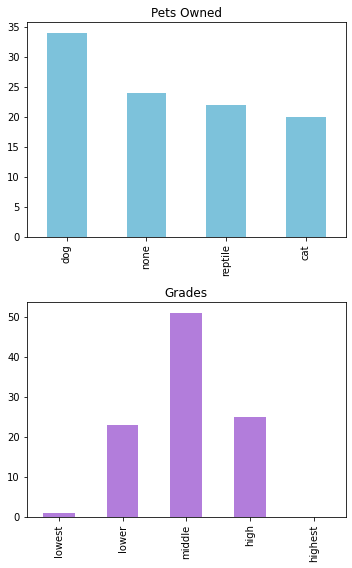

In [42]:
# Plot categorical values
plt.subplot(2,1,1)
rand_df['Pet'].value_counts().plot(kind='bar', figsize=(5,8), color='#7dc2db')
plt.title('Pets Owned')
plt.subplot(2,1,2)
rand_df['Grade'].value_counts().sort_index().plot(kind='bar', figsize=(5,8), color='#b27ddb')
plt.title('Grades')
plt.tight_layout();

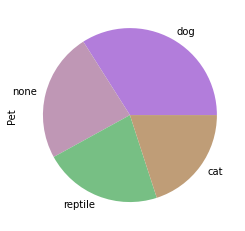

In [43]:
# No! Not a pie chart!
pet_colors = ('#b27ddb', '#bf97b5', '#77bf84', '#bf9d77')
rand_df['Pet'].value_counts().plot(kind='pie', colors=pet_colors);

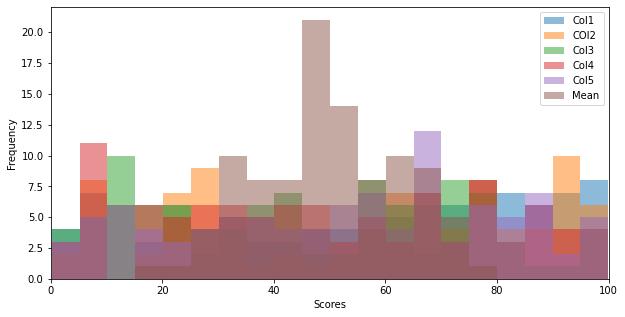

In [44]:
# Plot the continuous values, letting all the columns overlayed
rand_df.plot(kind='hist', xlim=(0,100), bins=20, alpha=0.5, figsize=(10,5))
plt.xlabel('Scores');

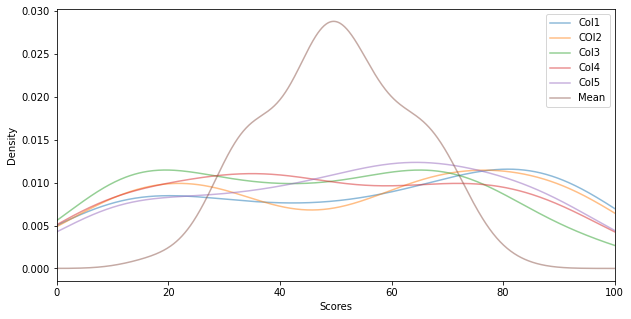

In [45]:
rand_df.plot(kind='density', xlim=(0,100), alpha=0.5, figsize=(10,5))
plt.xlabel('Scores');

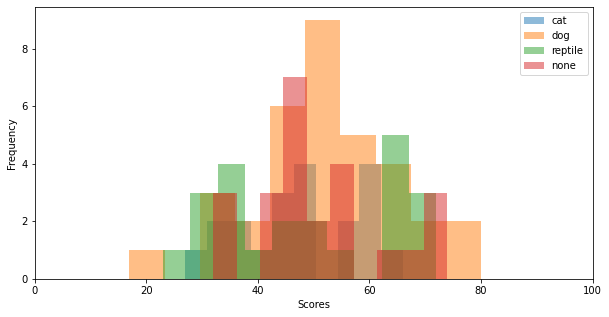

In [46]:
# Mean scores by pets, Yes, this *is* a serious, deep, and scientific study being conducted here. ;)
for pet in pets:
  rand_df[rand_df['Pet']==pet]['Mean'].plot(kind='hist', xlim=(0,100), figsize=(10,5), alpha=0.5, label=pet)

plt.legend()
plt.xlabel('Scores');


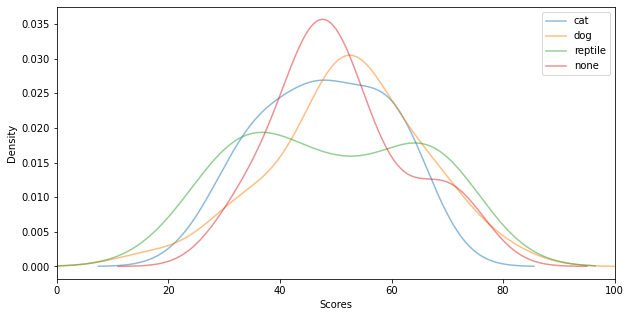

In [47]:
for pet in pets:
  rand_df[rand_df['Pet']==pet]['Mean'].plot(kind='density', xlim=(0,100), figsize=(10,5), alpha=0.5, label=pet)

plt.legend()
plt.xlabel('Scores');

In [48]:
# And pets crosstabbed with grades.
pet_grades = pd.crosstab(rand_df['Grade'], rand_df['Pet'],normalize=True)
pet_grades

Pet,cat,dog,none,reptile
Grade,,,,
lowest,0.00,0.01,0.00,0.00
lower,0.06,0.05,0.03,0.09
middle,0.11,0.19,0.16,0.05
high,0.03,0.09,0.05,0.08


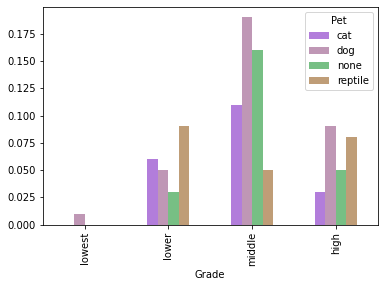

In [49]:
pet_grades.plot(kind='bar', color=pet_colors);

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

In [50]:
# On to the 538 example, load example and data
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)


In [51]:
# read the data from 538's github repo
reviews_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
reviews_df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [52]:
#convert timestamps into time date and make into index
reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'])
reviews_df.set_index('timestamp', inplace=True)
reviews_df.head(3)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0


In [53]:
#get just rows for the last day
lastday = reviews_df['2017-08-29']
lastday.head(3)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0


In [54]:
# And filter to just IMDB users
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7


In [55]:
# last row conntains the final results? And just the percentages.
final_results = lastday_filtered.tail(1)

# I *so* detest repetitive typing of column labels like those. I'll let the computer 
# do that!
cols = []
for i in range(1,11):
  cols.append(str(i)+'_pct')

# And put it into final form
final_data = final_results[cols].T
final_data.index = range(1,11)
final_data.columns = ['percent']
final_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


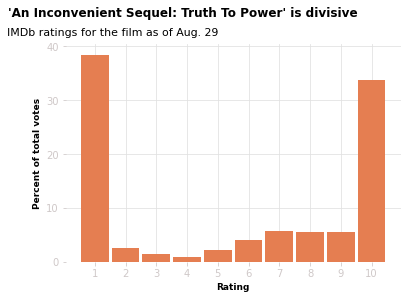

In [108]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots()
# background color
fig.patch.set(facecolor='white')

#barchart
#set also zorder to move bars to foreground
ax.bar(x=range(1,11), height=final_data['percent'], width=0.9, color="#e57e51",
       zorder=3)

ax.set(facecolor='white')

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=11, x=-1.85, y=42)

ax.set_xlabel("Rating", fontsize=9, fontweight='bold')
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold')

ax.set_xticklabels(range(1,11))
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50, 10))

# finessing replication of the originalborderspines none
# z order 0 (bars set earlier to 3)
ax.grid(color='#e1e1e1', zorder=0)

# original had no spines, so we won't either
for s in ['bottom', 'top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.tick_params(axis='x', colors='#cfc8c8')
ax.tick_params(axis='y', colors='#cfc8c8')


In [80]:
# For comparison with the original now. DIfferent font though still. 
display(example)

### 2) Reproduce another example from [FiveThirtyEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.


In [174]:
impeach_df = pd.read_csv('impeachment_topline.csv')
impeach_df.head()

,president,subgroup,party,category_group,modeldate,yes_estimate,no_estimate,timestamp
0,Donald Trump,All polls,ind,begin,2/12/2020,49.454309,41.289879,08:15:52 12 Feb 2020
1,Donald Trump,All polls,rep,impeach,2/12/2020,12.591837,84.426929,08:16:14 12 Feb 2020
2,Donald Trump,All polls,all,all,2/12/2020,49.376252,45.621788,08:15:13 12 Feb 2020
3,Donald Trump,All polls,all,remove,2/12/2020,47.647956,45.773506,08:15:26 12 Feb 2020
4,Donald Trump,All polls,ind,all,2/12/2020,45.486034,44.477179,08:15:48 12 Feb 2020


In [175]:
impeach_df['timestamp'] = pd.to_datetime(impeach_df['timestamp'])

impeach_df.head()

,president,subgroup,party,category_group,modeldate,yes_estimate,no_estimate,timestamp
0,Donald Trump,All polls,ind,begin,2/12/2020,49.454309,41.289879,2020-02-12 08:15:52
1,Donald Trump,All polls,rep,impeach,2/12/2020,12.591837,84.426929,2020-02-12 08:16:14
2,Donald Trump,All polls,all,all,2/12/2020,49.376252,45.621788,2020-02-12 08:15:13
3,Donald Trump,All polls,all,remove,2/12/2020,47.647956,45.773506,2020-02-12 08:15:26
4,Donald Trump,All polls,ind,all,2/12/2020,45.486034,44.477179,2020-02-12 08:15:48


In [176]:
# Boil down to essential columns: timestamp, party, category_group, yes_estimate to reproduce first plot in article
impeach_df = impeach_df[['timestamp', 'party', 'category_group', 'yes_estimate']]

#and to just 'all' for category_group
impeach_df = impeach_df[impeach_df['category_group']=='all']

#separate month/day from timestamp
impeach_df['date'] = impeach_df['timestamp'].dt.date
#impeach_df.set_index('date', inplace=True)
impeach_df.drop(['timestamp', 'category_group'], axis=1, inplace=True)


impeach_df.head(10)

,party,yes_estimate,date
2,all,49.376252,2020-02-12
4,ind,45.486034,2020-02-12
10,rep,12.400982,2020-02-12
12,dem,84.388276,2020-02-12
16,dem,84.388276,2020-02-12
23,ind,45.486034,2020-02-12
28,rep,12.400982,2020-02-12
29,all,49.376252,2020-02-12
32,dem,85.171166,2020-02-10
40,ind,46.486982,2020-02-10


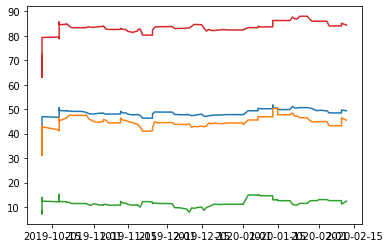

In [177]:
parties = ['all', 'ind', 'rep', 'dem']
for party in parties:
  temp = impeach_df[impeach_df['party']==party]
  plt.plot(temp['date'], temp['yes_estimate'])
plt.show()



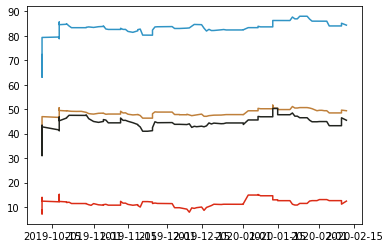

In [179]:
# Well, that's a very rough version. Now to try to make it pretty. Get some colors
# by party
party_colors = {'all': '#bf803b', 'ind': '#22241f', 'dem': '#3094c5', 'rep': '#db2c17'}
for party in parties:
  temp = impeach_df[impeach_df['party']==party]
  plt.plot(temp['date'], temp['yes_estimate'], color=party_colors[party] )
plt.show()

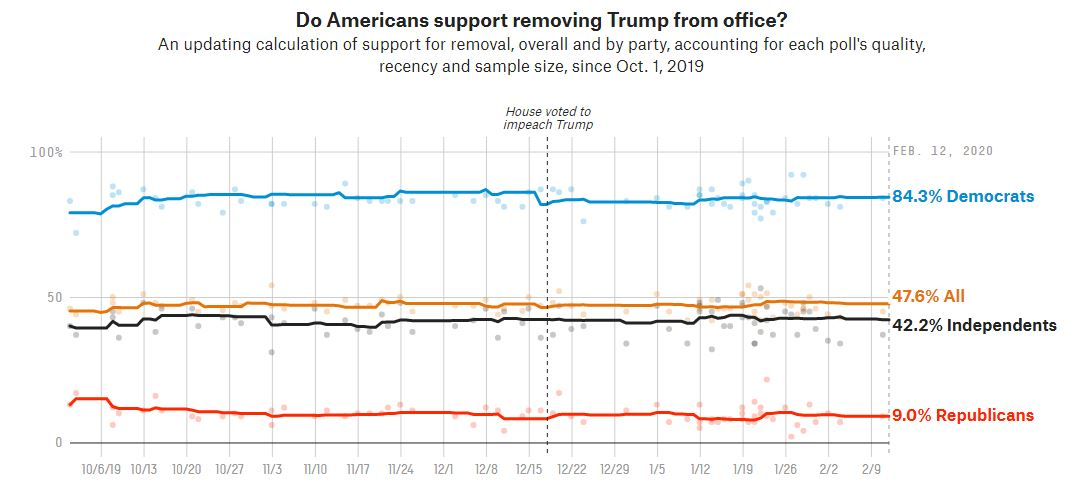

In [154]:
orig = Image(filename='Capture3.JPG')
display(orig)


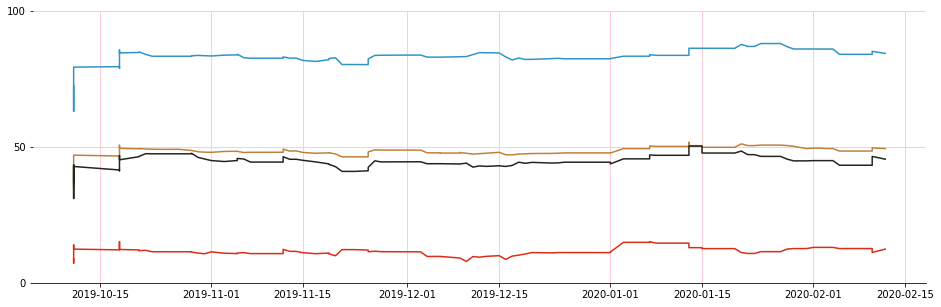

In [200]:
fig, ax = plt.subplots(figsize=(16,5))
for party in parties:
  temp = impeach_df[impeach_df['party']==party]
  ax.plot(temp['date'], temp['yes_estimate'], color=party_colors[party] )

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

# z order 0 (bars set earlier to 3)
ax.grid(color='pink', zorder=0)


ax.set_yticklabels(range(0, 101, 50))
ax.set_yticks(range(0, 101, 50));

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here